In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
import math
import seaborn as sns

In [2]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydotplus 

In [5]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [6]:
df.shape

(858, 36)

In [7]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [8]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

There are some missing values named as "?" due to which the whole colum become an object. 
So we will replace "?" with Nan and convert the object type into numeric type

In [10]:
df = df.replace('?', np.nan)

In [16]:
# check nan counts int different columns
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [12]:
# df.info()

In [13]:
index = ["Age", "Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)",
"Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis",
"STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease",
"STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis",
"STDs: Time since first diagnosis","STDs: Time since last diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx","Hinselmann","Schiller",
"Citology", "Biopsy"]

In [14]:
# All the attributres are made numeric types
for i in index:
    df[i] = pd.to_numeric(df[i])

In [17]:
# The data is changed into numeric type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

Now replace all the nun values

For continuous variable, we will fill the median values

For catogerical values, we will fill 1

In [18]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [19]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [21]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


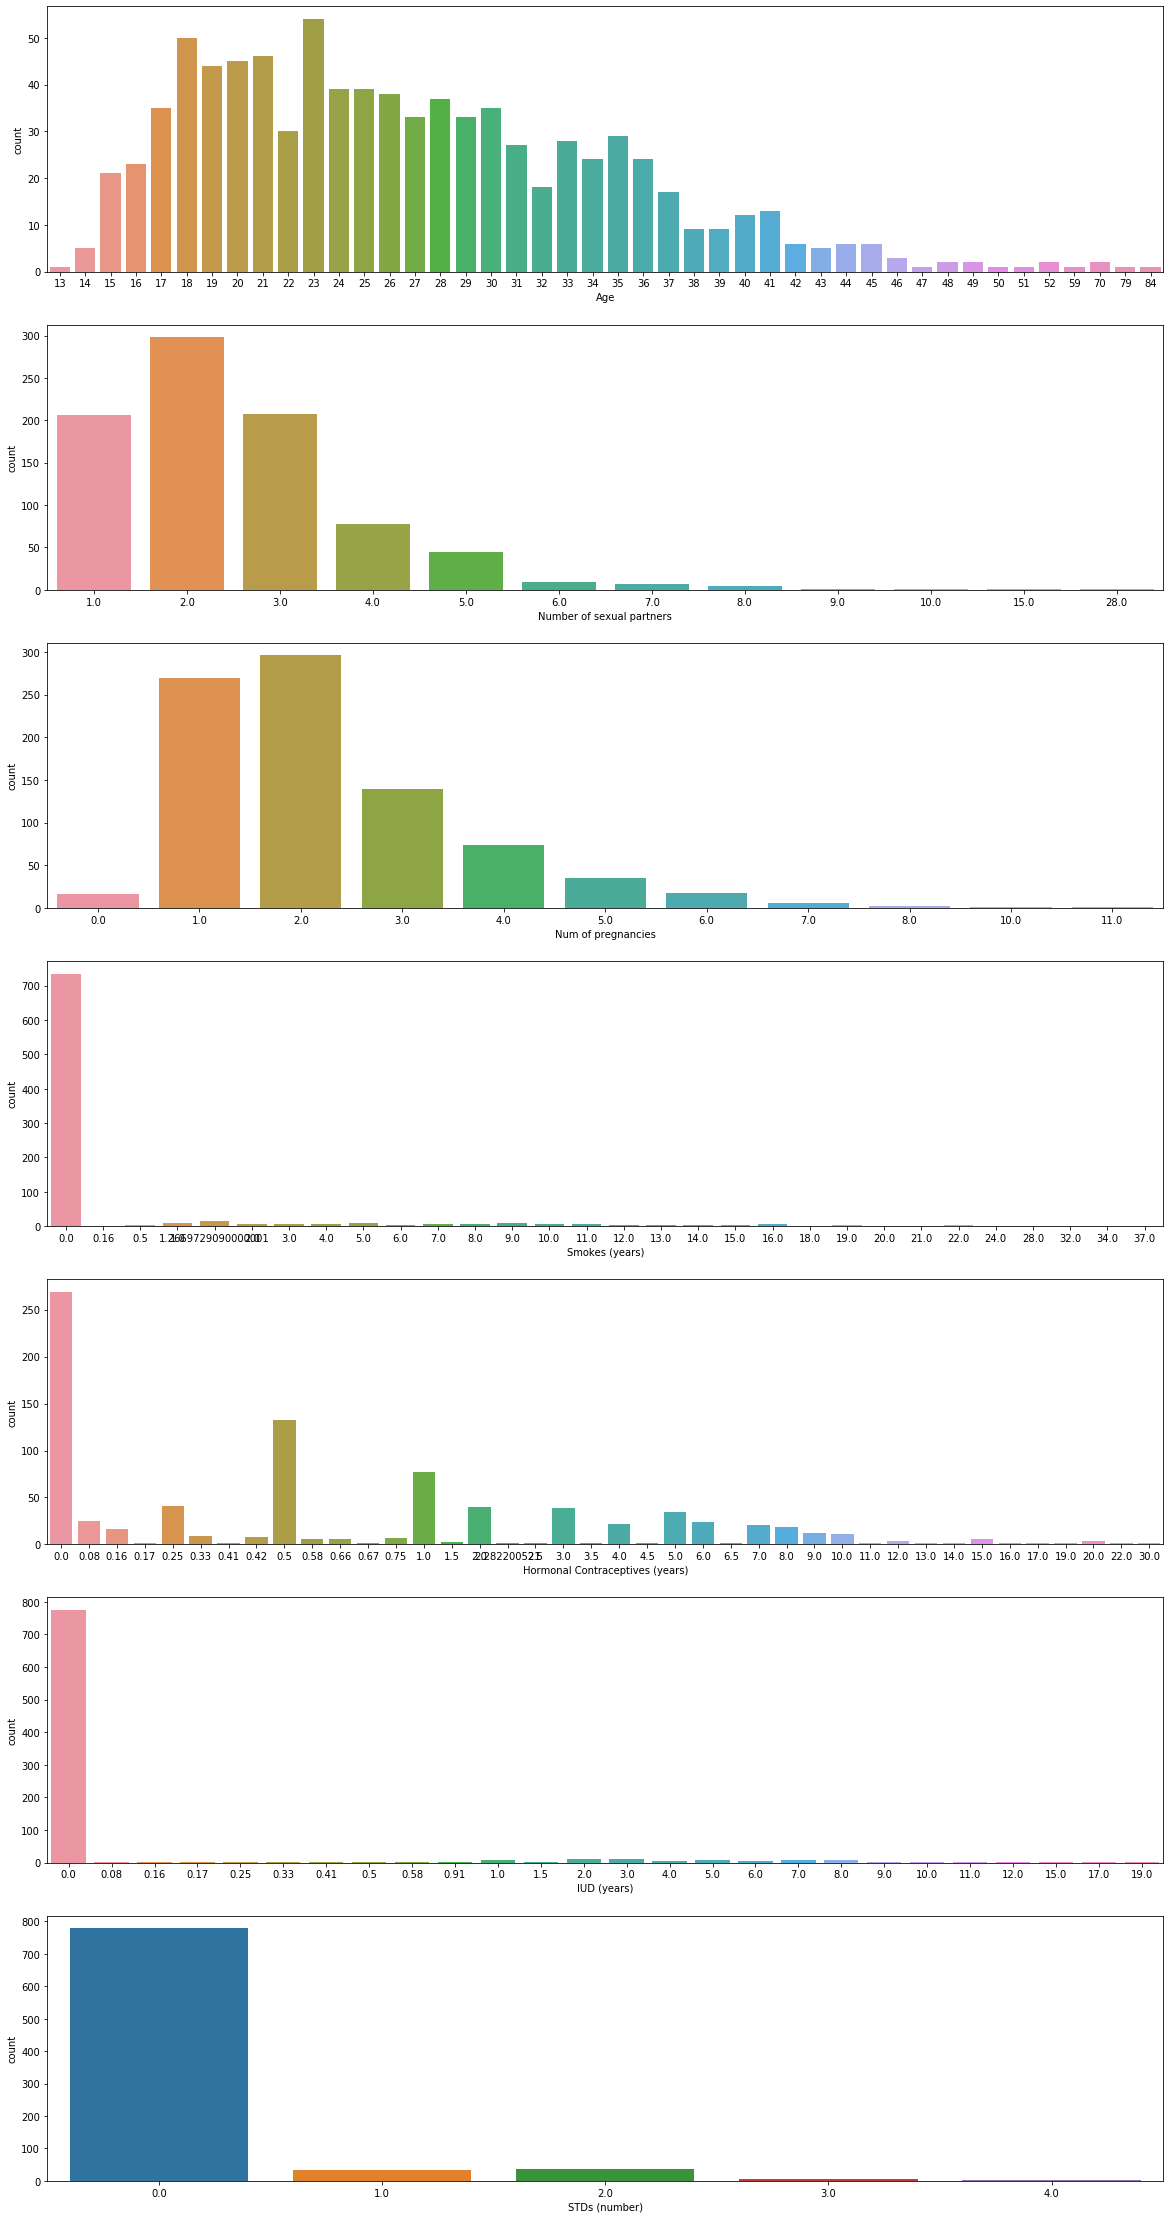

In [23]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

Shuffle the data into Training and Testing

In [24]:
# np.random.seed(42)
df_data_shuffle = df.iloc[np.random.permutation(len(df))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]

In [25]:
train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

In [26]:
train_label = np.array(df_train['Biopsy'])

In [27]:
test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

In [28]:
test_label = np.array(df_test['Biopsy'])

Data Scaling

In [29]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(train_feature)
test_feature = minmax_scale.fit_transform(test_feature)

In [30]:
print(train_feature.shape)
print(train_label[0])
print(test_feature[0])
print(test_label[0])

(685, 46)
0
[0.08695652 0.         0.26315789 0.18181818 0.         0.
 0.01315789 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.2        0.13333333
 1.         0.         0.         1.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0


Model of random Forsest Classiifer

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=500, 
                         oob_score=False, random_state=2019, verbose=0,warm_start=False)

random_forest = model.fit(train_feature, train_label)
predicted_train_label = random_forest.predict(train_feature)
predicted_test_label = random_forest.predict(test_feature)

recall_score(test_label, predicted_test_label)

0.75

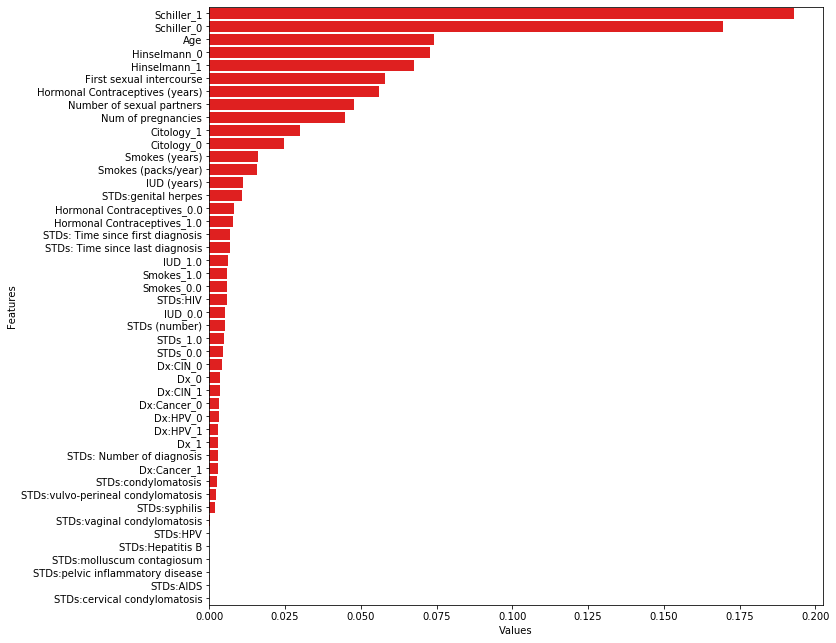

In [32]:
result_rf = pd.DataFrame()
result_rf['Features'] = df.columns.drop('Biopsy')
result_rf ['Values'] = random_forest.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Red")
plt.show()

Logistic Regression Model

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
name2 = 'LogisticRegMulti'
model2 = LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')

lbm = RFE(model, 10)
lbm = lbm.fit(train_feature, train_label)

predicted_train_label = lbm.predict(train_feature)
predicted_test_label = lbm.predict(test_feature)

recall_score(test_label, predicted_test_label)

0.75

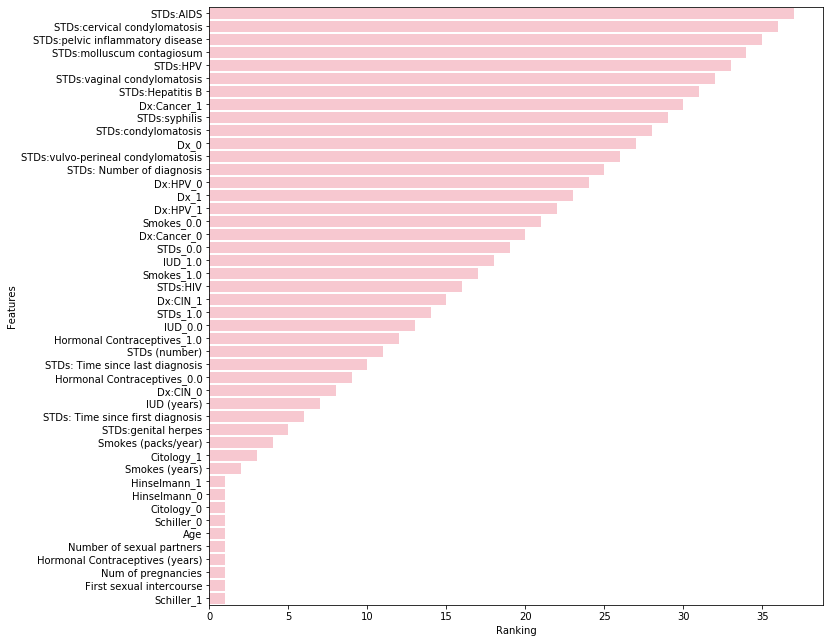

In [34]:
result_lg = pd.DataFrame()
result_lg['Features'] = df.columns.drop('Biopsy')
result_lg ['Ranking'] = lbm.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="Pink")
plt.show()

In [35]:
name3 = 'LogisticRegOVR'
model3 = LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')

lro = RFE(model, 10)
lro = lro.fit(train_feature, train_label)

predicted_train_label1 = lro.predict(train_feature)
predicted_test_label1 = lro.predict(test_feature)

recall_score(test_label, predicted_test_label1)

0.75

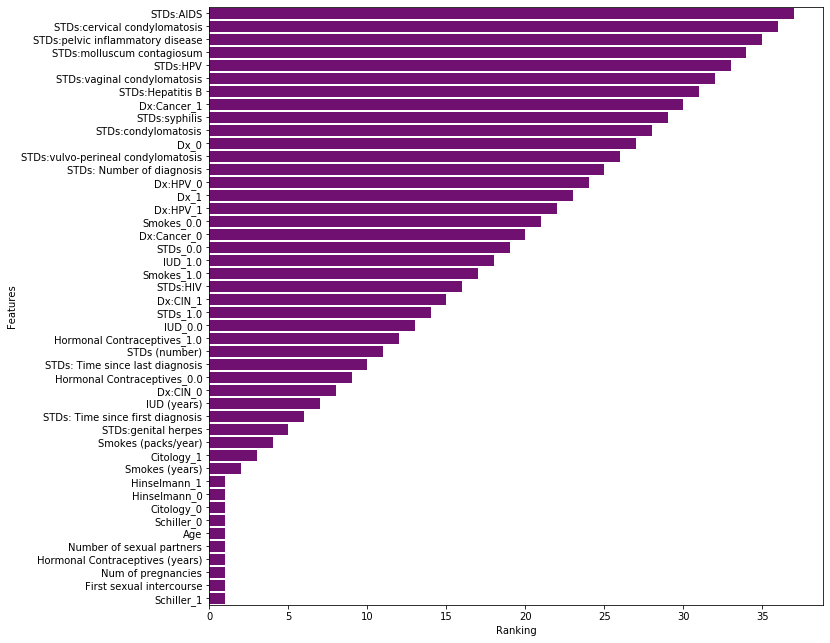

In [36]:
result_lg = pd.DataFrame()
result_lg['Features'] = df.columns.drop('Biopsy')
result_lg ['Ranking'] = lro.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="Purple")
plt.show()

DecisionTreeClassifier Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [38]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6)
dtc.fit(train_feature, train_label)

predicted_train_label2 = dtc.predict(train_feature)
predicted_test_label2 = dtc.predict(test_feature)

recall_score(test_label, predicted_test_label2)

0.75

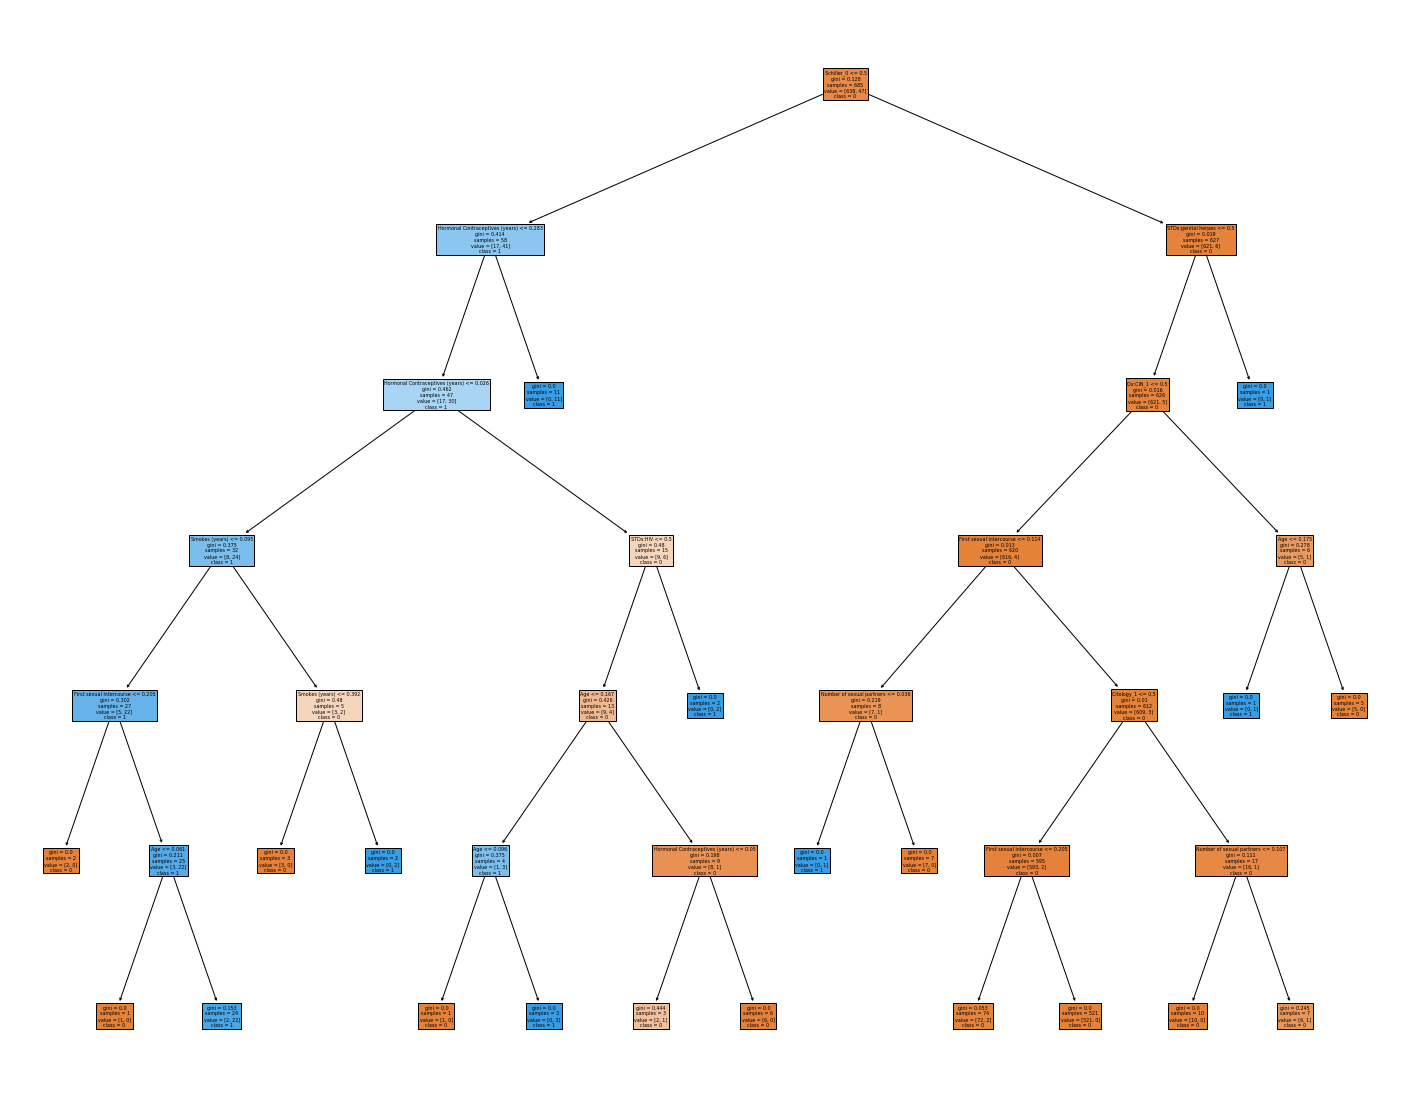

In [40]:
text_representation = tree.export_text(dtc)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
    
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
                   feature_names=df.columns.drop('Biopsy'),  
                   class_names=['0','1'],
                   filled=True)

Coorelation between different features

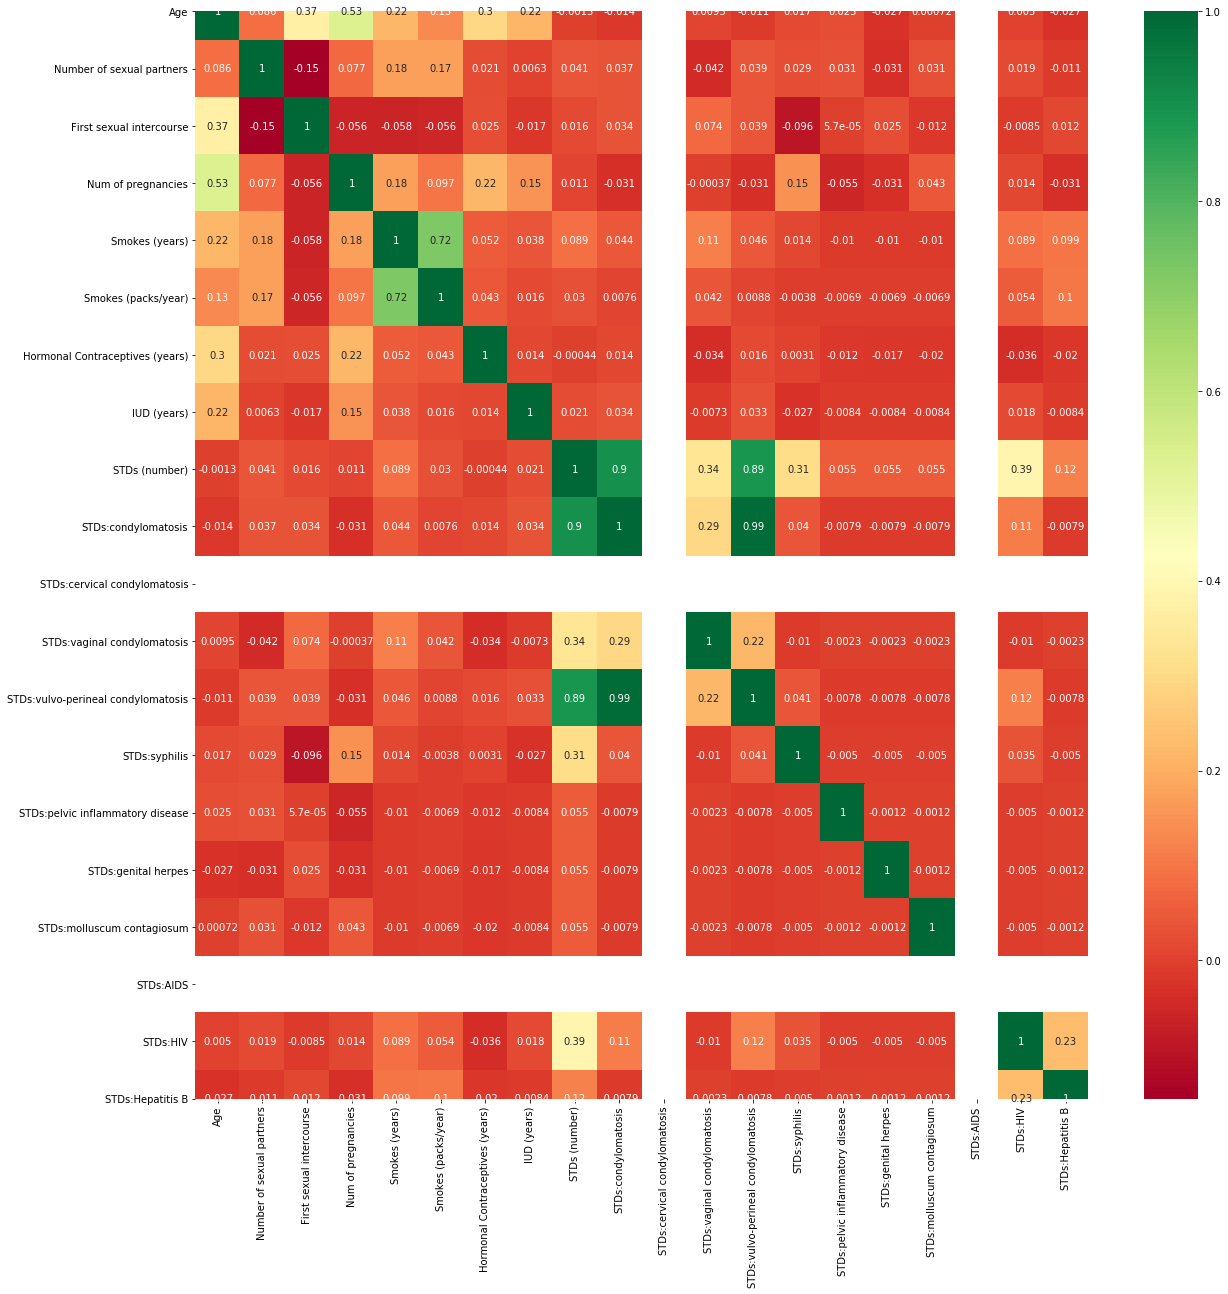

In [41]:
# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index[0:20]
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")